In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
lp=pd.read_csv('loan_prediction.csv')
lp

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [31]:
# finding the data type of each columns
lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [32]:
# Finding null values present in the data
lp.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

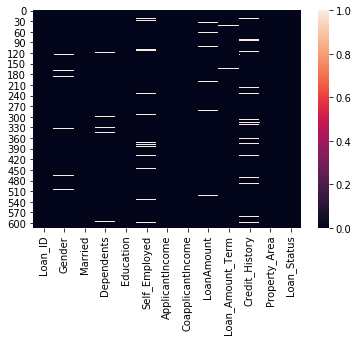

In [33]:
# it shows that there are many more null values are present in the data
sns.heatmap(lp.isnull())

In [34]:
# Filling the all missing values 
lp['Credit_History'].fillna(lp['Credit_History'].mean(),inplace=True)
lp['LoanAmount'].fillna(lp['LoanAmount'].mean(),inplace=True)
lp['Loan_Amount_Term'].fillna(lp['Loan_Amount_Term'].mean(),inplace=True)
lp['Self_Employed'].fillna(lp['Self_Employed'].mode()[0],inplace=True)
lp['Married'].fillna(lp['Married'].mode()[0],inplace=True)
lp['Gender'].fillna(lp['Gender'].mode()[0],inplace=True)
lp['Dependents'].fillna(lp['Dependents'].mode()[0],inplace=True)

In [35]:
lp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lp['Loan_Status']=le.fit_transform(lp['Loan_Status'])
lp['Property_Area']=le.fit_transform(lp['Property_Area'])
lp['Education']=le.fit_transform(lp['Education'])
lp['Self_Employed']=le.fit_transform(lp['Self_Employed'])
lp['Married']=le.fit_transform(lp['Married'])
lp['Gender']=le.fit_transform(lp['Gender'])
lp['Dependents']=le.fit_transform(lp['Dependents'])

In [37]:
lp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [38]:
# get the property area for loan approval
lp['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

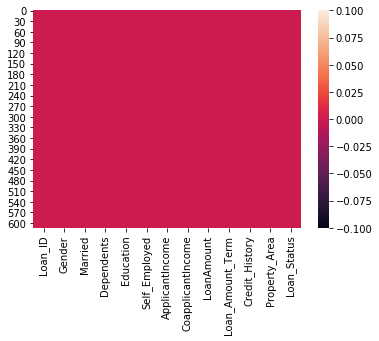

In [39]:
# it show that there is no null values present in the dataset
sns.heatmap(lp.isnull())

In [40]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 45.7+ KB


# Observing the outliers in the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x2401a82eb88>,
 'caps': [<matplotlib.lines.Line2D at 0x2401a82ed08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2401a82e308>],
 'medians': [<matplotlib.lines.Line2D at 0x2401a834d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2401a834d88>],
 'means': []}

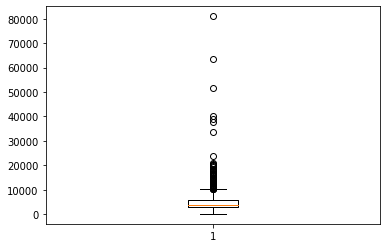

In [41]:
plt.boxplot(lp['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2401a898dc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2401a898f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2401a898548>],
 'medians': [<matplotlib.lines.Line2D at 0x2401a89cf08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2401a89cf88>],
 'means': []}

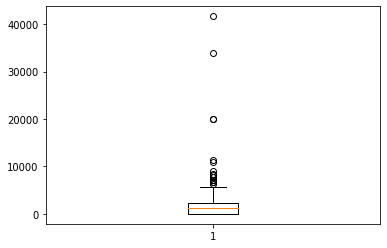

In [42]:
plt.boxplot(lp['CoapplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2401a8f8ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x2401a8feb88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2401a8f5f88>],
 'medians': [<matplotlib.lines.Line2D at 0x2401a903cc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2401a903dc8>],
 'means': []}

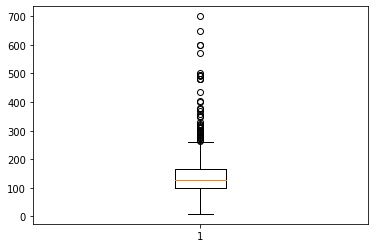

In [43]:
plt.boxplot(lp['LoanAmount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2401a96b688>,
 'caps': [<matplotlib.lines.Line2D at 0x2401a96bf08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2401a968b88>],
 'medians': [<matplotlib.lines.Line2D at 0x2401a96fe48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2401a974cc8>],
 'means': []}

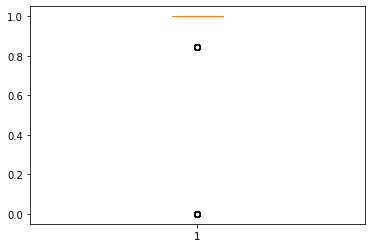

In [44]:
plt.boxplot(lp['Credit_History'])

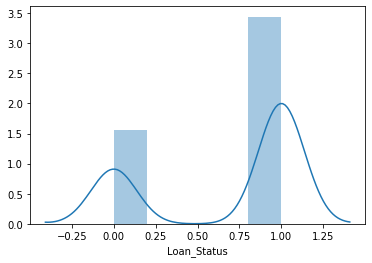

In [45]:
# Checking the distribution of skewness in the data
sns.distplot(lp['Loan_Status'])

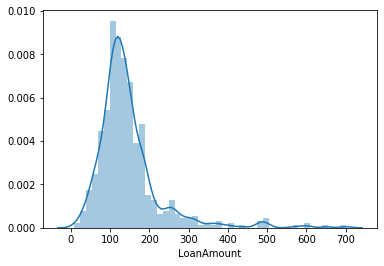

In [46]:
sns.distplot(lp['LoanAmount'])

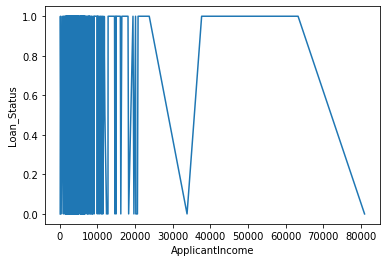

In [47]:
sns.lineplot(x='ApplicantIncome',y='Loan_Status',data=lp)

In [48]:
# Finding the loan application approved/Rejected 
print('No Of Loan Approved are - ',lp['Loan_Status'].value_counts()[1])
print('No Of Loan Rejected are - ',lp['Loan_Status'].value_counts()[0])

No Of Loan Approved are -  422
No Of Loan Rejected are -  192


In [49]:
del(lp['Loan_ID'])

In [50]:
# lets finding the coorelation of the data
lp.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


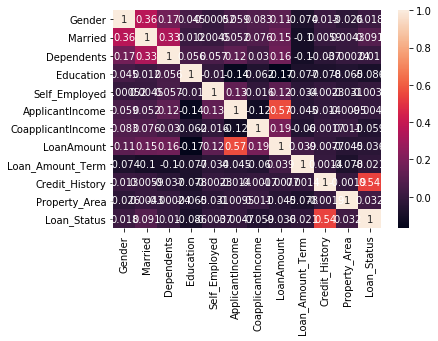

In [57]:
sns.heatmap(lp.corr(),annot=True)

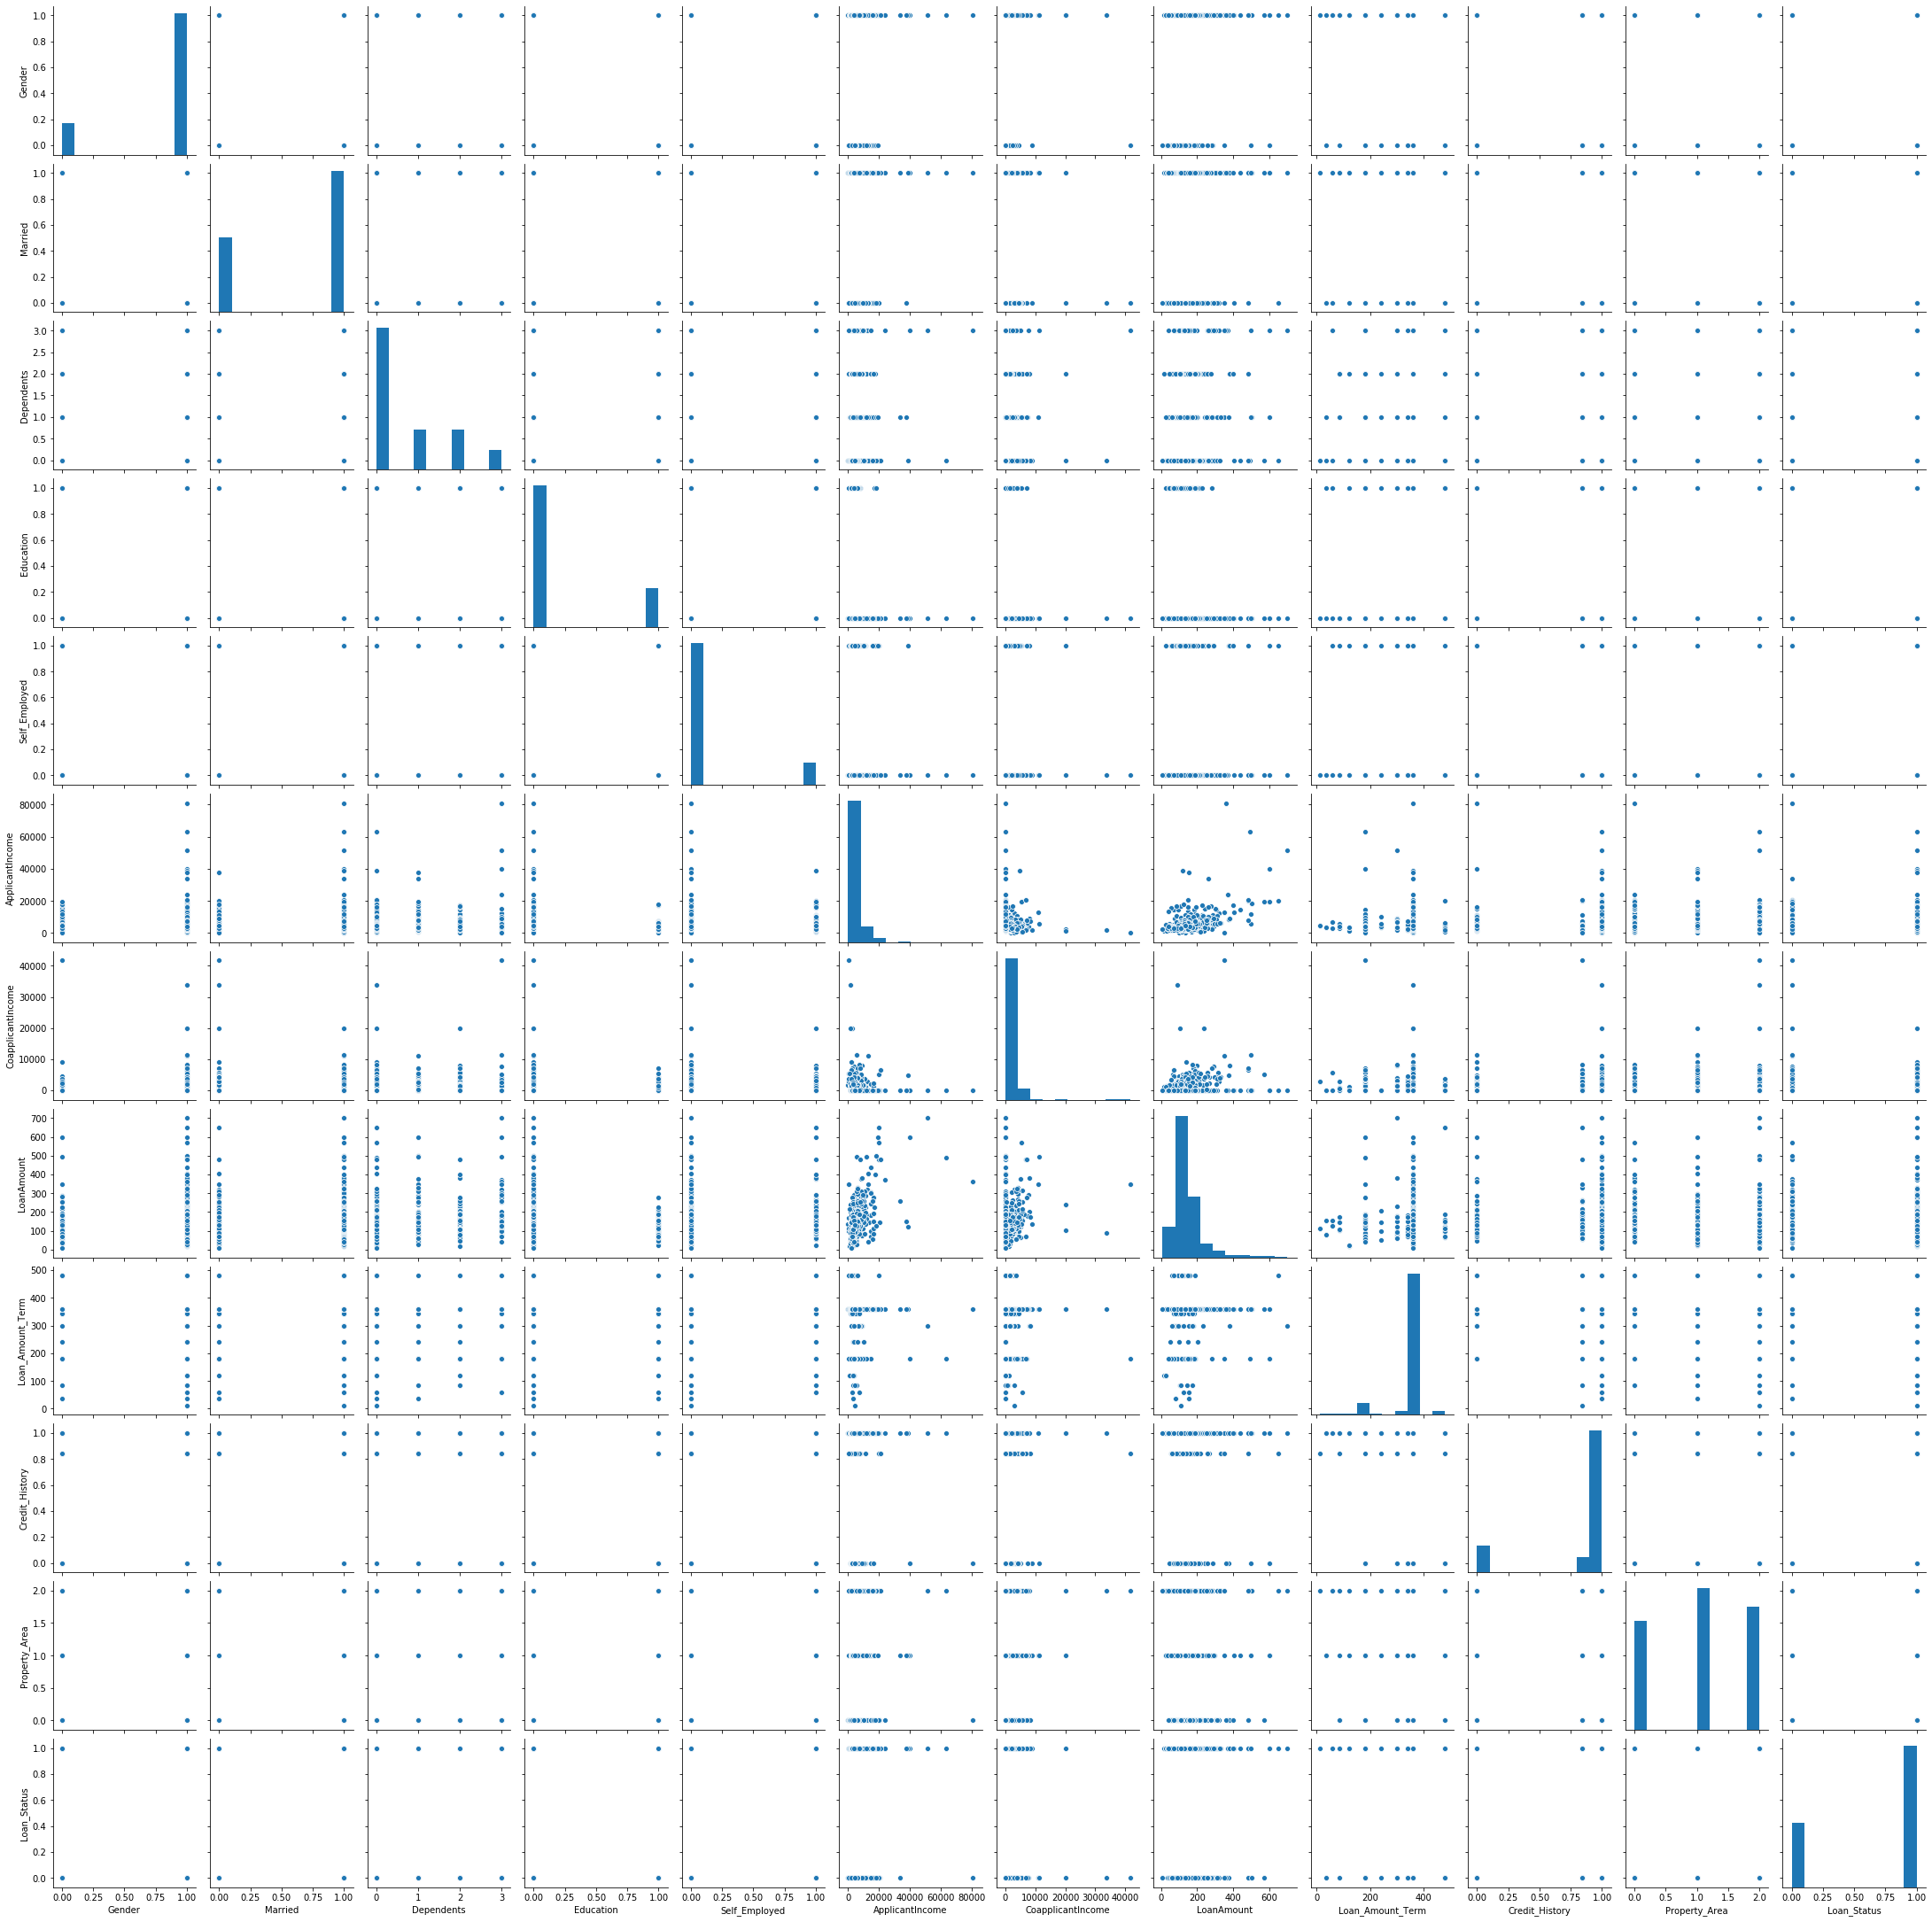

In [56]:
sns.pairplot(lp)

# Removing skewness and outliers from the data set 

In [61]:
lp.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [52]:
from scipy.stats import zscore
z=np.abs(zscore(lp))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.45164045, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.45164045, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.45164045, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.45164045, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.45164045, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.41044061, 0.04760721,
        1.48253724]])

In [62]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [63]:
lpd=lp[(z<3).all(axis=1)]
lpd

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [64]:
print(lp.shape , lpd.shape)

(614, 12) (577, 12)


In [67]:
for col in lpd.columns:
    if lpd.skew().loc[col]>0.55:
        lpd[col]=np.log1p(lpd[col])

# Seprating the input and output variables from the data set 

In [70]:
x=lpd.iloc[:,0:-1]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.000000,0.000000,0.000000,8.674197,0.000000,4.993232,360.0,1.0,2
1,1,1,0.526589,0.000000,0.000000,8.430327,7.319202,4.859812,360.0,1.0,0
2,1,1,0.000000,0.000000,0.526589,8.006701,0.000000,4.204693,360.0,1.0,2
3,1,1,0.000000,0.526589,0.000000,7.857094,7.765993,4.795791,360.0,1.0,2
4,1,0,0.000000,0.000000,0.000000,8.699681,0.000000,4.955827,360.0,1.0,2


In [71]:
y=lpd['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [74]:
# Training the model of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(461, 11) (116, 11)
(461,) (116,)


In [75]:
# fit the model
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [77]:
lgr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
sv=SVC()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
models=[]
models.append(('LogisticRegression',lgr))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',sv))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))

In [78]:
Model=[]
score=[]
cvs= []
rocscore=[]
for i,model in models:
    print('****************',i,'*****************','\n')
    Model.append(i)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score is ',AS,'\n')
    score.append(AS*100)
    CM=confusion_matrix(y_test,pre)
    print('Confusion Matrix is \n',CM,'\n')
    print('Classification Report is \n',classification_report(y_test,pre),'\n')
    cs=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross Validation Score is',cs,'\n')
    cvs.append(cs*100)
    fpr,tpr,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('Roc Auc Score is',roc_auc,'\n')
    rocscore.append(roc_auc*100)

**************** LogisticRegression ***************** 

Accuracy Score is  0.8275862068965517 

Confusion Matrix is 
 [[12 19]
 [ 1 84]] 

Classification Report is 
               precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.82      0.99      0.89        85

    accuracy                           0.83       116
   macro avg       0.87      0.69      0.72       116
weighted avg       0.84      0.83      0.80       116
 

Cross Validation Score is 0.8180809595202397 

Roc Auc Score is 0.6876660341555978 

**************** DecisionTreeClassifier ***************** 

Accuracy Score is  0.7155172413793104 

Confusion Matrix is 
 [[15 16]
 [17 68]] 

Classification Report is 
               precision    recall  f1-score   support

           0       0.47      0.48      0.48        31
           1       0.81      0.80      0.80        85

    accuracy                           0.72       116
   macro avg       0.64      0.6

In [79]:
result=pd.DataFrame({'Model':Model,'Accuracy Score':score,'Cross Val Score':cvs,'AUC ROC Score':rocscore})
result

,Model,Accuracy Score,Cross Val Score,AUC ROC Score
0,LogisticRegression,82.758621,81.808096,68.766603
1,DecisionTreeClassifier,71.551724,70.196402,64.193548
2,KNeighborsClassifier,75.862069,71.761619,63.036053
3,SVC,73.275862,68.977511,50.000000
4,RandomForestClassifier,83.620690,79.553223,71.404175
5,AdaBoostClassifier,81.896552,79.383808,70.227704
6,GradientBoostingClassifier,81.034483,78.866567,68.614801


In [82]:
rfc=RandomForestClassifier()
grid_param={
     'criterion':['gini','entropy']
}
sr_gd=GridSearchCV(estimator=rfc,
                       param_grid=grid_param,
                       scoring='accuracy',
                       cv=5)

sr_gd.fit(x,y)
best_parameters=sr_gd.best_params_
print(best_parameters)
best_result=sr_gd.best_score_
print(best_result)

{'criterion': 'entropy'}
0.7990104947526238


In [84]:
from sklearn.externals import joblib
joblib.dump(rfc,'Sales_Prediction.pkl')

['Sales_Prediction.pkl']